Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually. Perform PCA and K-means clustering.

In [1]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
features=iris.data
target=iris.target
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


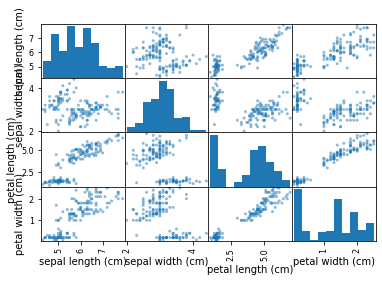

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df)
plt.show()

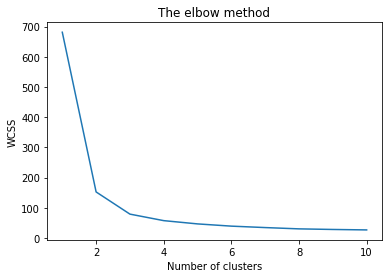

In [7]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values 
# as it is unsupervised learning we don't require the dependent variable Y

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The elbow determines the number of clusters.

From this we choose the number of clusters as ** '3**'.

In [5]:
#Principal Component Analysis
from sklearn.decomposition import PCA

In [6]:
from sklearn import preprocessing
pca=PCA(n_components=2) #X and Y
pc=pca.fit_transform(iris_df)

print(pc[:10])

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [9]:
#re-fit kmeans to Priniciple components with appropriate number of clusters
kmeans=KMeans(n_clusters=3)
kmeans.fit(pc)

KMeans(n_clusters=3)

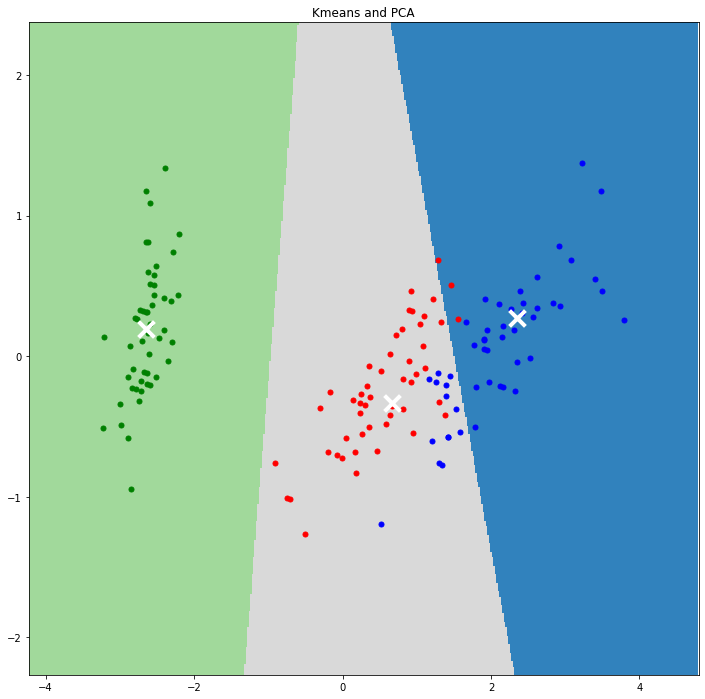

In [16]:
#visualising 

h =0.02 #size of mesh grid

#generate mesh grid
x_min, x_max=pc[:,0].min()-1, pc[:,0].max()+1
y_min, y_max= pc[:,1].min()-1,pc[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

#label each point using last trained model
Z=kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

#generate color plots
Z=Z.reshape(xx.shape)
plt.figure(figsize=(12,12))
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(),xx.max(),yy.min(), yy.max()), cmap= plt.cm.tab20c,aspect='auto',origin='lower')

#plot principal components
for i, point in enumerate(pc):
    if target[i]==0:
        plt.plot(point[0],point[1],'g.',markersize=10)
    if target[i]==1:
        plt.plot(point[0],point[1],'r.',markersize=10)
    if target[i]==2:
        plt.plot(point[0],point[1],'b.',markersize=10)

#cluster centroids
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=250, linewidth=4,color='w',zorder=10)

plt.title('Kmeans and PCA')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks()
plt.yticks()

plt.show()

In [17]:
#cluster accuracy
from sklearn import metrics

kmeans1=KMeans(n_clusters=3)
kmeans1.fit(features)

#kmeans on pca data
kmeans2=KMeans(n_clusters=3)
kmeans2.fit(pc)

#print metrics for non reduced data
print('Without PCA')
print('Homogeneity: {}'.format(metrics.homogeneity_score(target, kmeans1.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(target,kmeans1.labels_)))
print('V-measure: {}'.format(metrics.v_measure_score(target,kmeans1.labels_)) )

#print metrics for reduced data
print('With PCA')
print('Homogeneity: {}'.format(metrics.homogeneity_score(target, kmeans2.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(target,kmeans2.labels_)))
print('V-measure: {}'.format(metrics.v_measure_score(target,kmeans2.labels_)) )

Without PCA
Homogeneity: 0.7514854021988338
Completeness: 0.7649861514489815
V-measure: 0.7581756800057784
With PCA
Homogeneity: 0.736419288125285
Completeness: 0.7474865805095325
V-measure: 0.7419116631817838
